<a href="https://colab.research.google.com/github/Pranayasri-Yellu/google-colab-codes/blob/main/shipment_classification_data_collection_and_feature_engieering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
df = pd.read_csv('/content/Shipments_Data.csv')

In [3]:
# Data Preprocessing
# Handle inconsistent categorical values
df['Product_importance'] = df['Product_importance'].str.lower()
df['Mode_of_Shipment'] = df['Mode_of_Shipment'].replace('Flight', 'Air')  # Assuming Flight is same as Air

In [4]:
# Convert negative discounts to zero
df['Discount_offered'] = df['Discount_offered'].apply(lambda x: max(x, 0))

In [5]:
# Encode categorical variables
label_encoders = {}
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [6]:
# Drop irrelevant column
df = df.drop('ID', axis=1)

In [7]:
# Split data into features and target
X = df.drop('Reached.on.Time_Y.N', axis=1)
y = df['Reached.on.Time_Y.N']

In [8]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Initialize and train model
model = RandomForestClassifier(n_estimators=100, random_state=50)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=50)

In [55]:
# Make predictions
y_pred = model.predict(X_test)

In [58]:
# Evaluate model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.25

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.38      0.33        32
           1       0.26      0.21      0.23        33
           2       0.19      0.17      0.18        35

    accuracy                           0.25       100
   macro avg       0.25      0.25      0.25       100
weighted avg       0.24      0.25      0.24       100



In [59]:
# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
print("\nFeature Importance:")
print(feature_importance.sort_values(ascending=False))


Feature Importance:
Cost             0.256485
Distance         0.245789
Weight           0.215533
Delivery_Time    0.161790
Shipping_Mode    0.076626
Fragile          0.043777
dtype: float64


In [60]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [61]:
# Load the dataset
df = pd.read_csv('/content/Shipments_Data.csv')

In [62]:

# Step 1: Data Collection (Simulated Dataset)
data = {
    'Weight': np.random.randint(1, 50, 500),
    'Distance': np.random.randint(10, 1000, 500),
    'Shipping_Mode': np.random.choice(['Air', 'Sea', 'Road', 'Rail'], 500),
    'Cost': np.random.randint(100, 5000, 500),
    'Fragile': np.random.choice(['Yes', 'No'], 500),
    'Delivery_Time': np.random.randint(1, 15, 500),
    'Shipment_Class': np.random.choice(['Express', 'Standard', 'Economy'], 500)
}

In [63]:
# Convert to DataFrame
df = pd.DataFrame(data)
print("Sample Data:")
print(df.head())

Sample Data:
   Weight  Distance Shipping_Mode  Cost Fragile  Delivery_Time Shipment_Class
0      47       882          Road  2151     Yes             12       Standard
1      28       339           Air  3810      No              4        Express
2      25       139          Rail  4405     Yes              7        Economy
3      16       839           Sea  3043     Yes              7        Express
4      38       709          Road  4157      No              4        Economy


In [64]:
# Step 2: Feature Engineering
# Encoding categorical features
le = LabelEncoder()
df['Shipping_Mode'] = le.fit_transform(df['Shipping_Mode'])
df['Fragile'] = le.fit_transform(df['Fragile'])
df['Shipment_Class'] = le.fit_transform(df['Shipment_Class'])  # Target variable

In [65]:
# Splitting features and target
X = df.drop(columns=['Shipment_Class'])
y = df['Shipment_Class']

In [66]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
# Step 3: Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [69]:
# Step 4: Model Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.3
Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.28      0.25        25
           1       0.21      0.23      0.22        31
           2       0.46      0.36      0.41        44

    accuracy                           0.30       100
   macro avg       0.30      0.29      0.29       100
weighted avg       0.32      0.30      0.31       100



In [70]:
# Step 5: Feature Importance
feature_importances = model.feature_importances_
features = X.columns

In [71]:
# Step 6: Visualization
plt.figure(figsize=(18, 6))

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

Text(0.5, 1.0, 'Confusion Matrix')

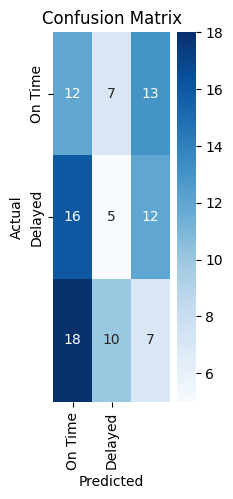

In [72]:
# Plot confusion matrix
plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["On Time", "Delayed"], yticklabels=["On Time", "Delayed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

Text(0.5, 1.0, 'Feature Importance in Shipment Classification')

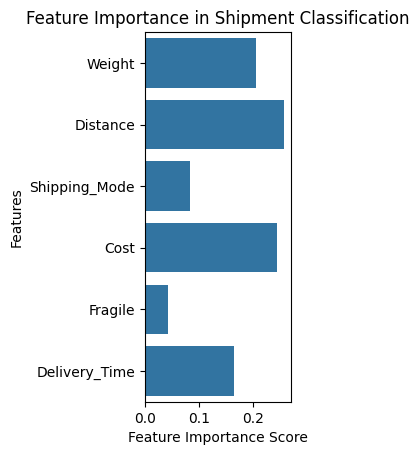

In [73]:
# Feature Importance
plt.subplot(1, 3, 2)
feature_importances = model.feature_importances_
features = X.columns
sns.barplot(x=feature_importances, y=features)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Shipment Classification")

<ipython-input-74-f7bcf3da7a15>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="coolwarm")


Text(0.5, 1.0, 'Distribution of Shipment Delays')

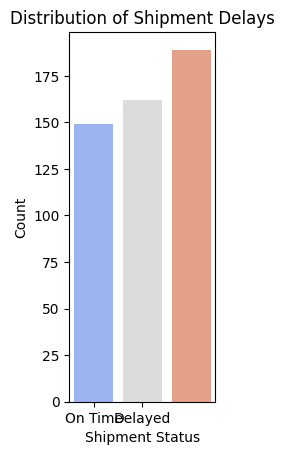

In [74]:
# Distribution of Shipment Delays
plt.subplot(1, 3, 3)
sns.countplot(x=y, palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=["On Time", "Delayed"])
plt.xlabel("Shipment Status")
plt.ylabel("Count")
plt.title("Distribution of Shipment Delays")

In [75]:
plt.tight_layout()
plt.show()



<Figure size 640x480 with 0 Axes>

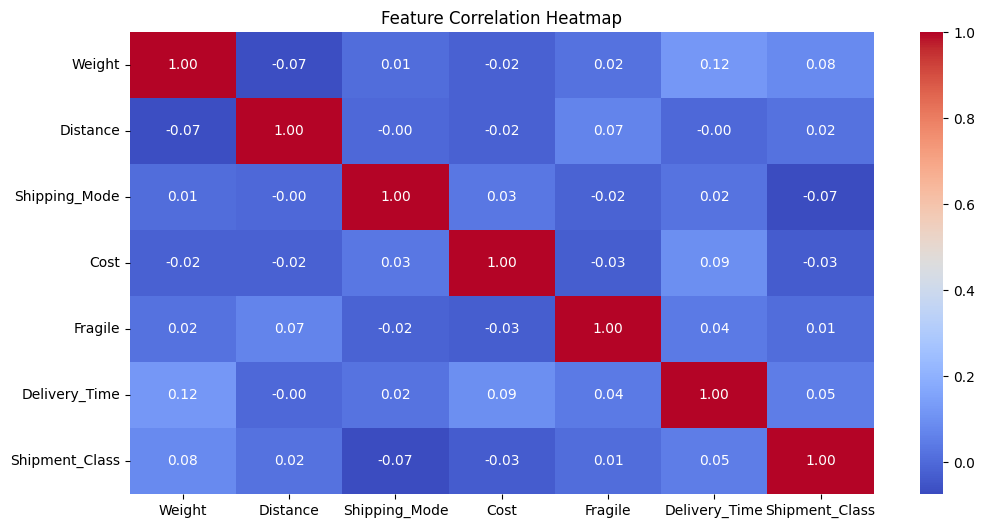

In [76]:
# Correlation Heatmap
plt.figure(figsize=(12, 6))
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

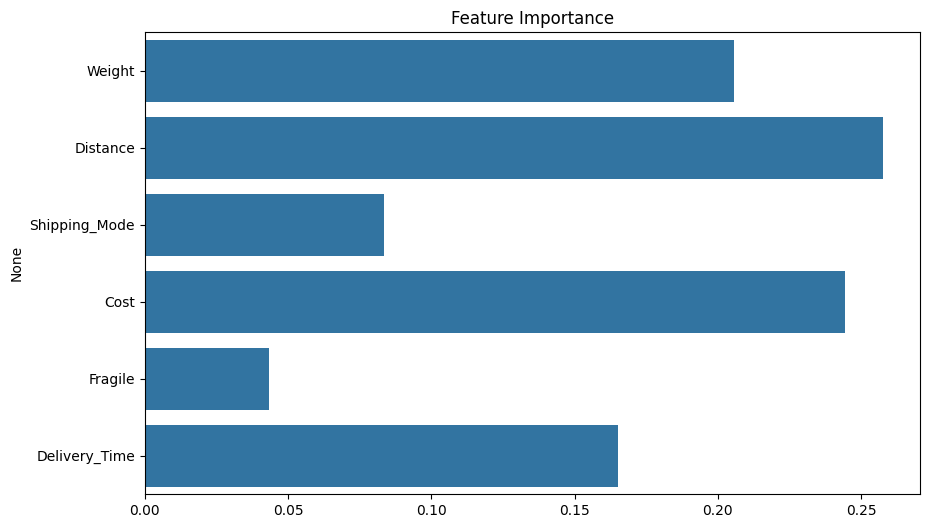

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance")
plt.show()

In [78]:
 #Model Training: Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [79]:
y_pred = model.predict(X_test)

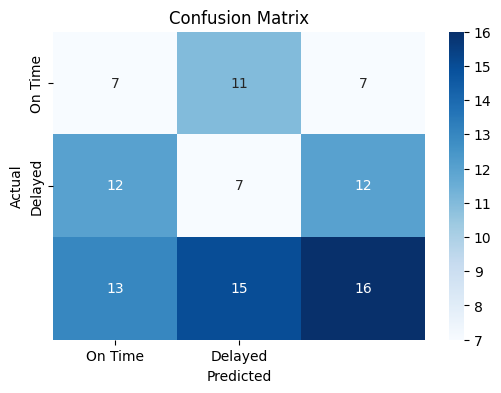

In [80]:
# Visualization: Plot confusion matrix
from sklearn.metrics import confusion_matrix # Import the confusion_matrix function

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["On Time", "Delayed"], yticklabels=["On Time", "Delayed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()